**Importing Necessary Libraries**

In [11]:
import numpy as np
import os
from collections import Counter
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

**Setting Up the Data Directory and File Listing**

In [15]:
data_dir = "/Users/tbs/Downloads/Assignment1_data"
file_names = sorted([f for f in os.listdir(data_dir) if f.endswith('.txt')])

**1Q) Show the matrix A: report M and N**

In [25]:
# Loading & cleaning the datasets
documents = []
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_dir, filename)
        try:
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                # Converting to lowercase
                text = file.read().lower()
                # Removing punctuation 
                text = text.translate(str.maketrans("", "", string.punctuation))
                # Tokenize the text  
                documents.append(text.split())
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# creating a list of unique words
vocabulary = set(word for doc in documents for word in doc)
# Sorting vocabulary for consistent order
vocab_list = sorted(vocabulary)  

# Setting up the word-document matrix dimensions
M = len(vocab_list)
N = len(documents)
word_to_index = {word: i for i, word in enumerate(vocab_list)}

# Initializing the word-document matrix
A = np.zeros((M, N))

# Fill the matrix with word frequencies in each document
for j, doc in enumerate(documents):
    word_counts = Counter(doc)
    for word, count in word_counts.items():
        if word in word_to_index:
            A[word_to_index[word], j] = count

# Displaying results
print(f"Vocabulary size (M): {M}")
print(f"Number of documents (N): {N}")
print("Word-Document Matrix (A):")
print(A)


Vocabulary size (M): 1170
Number of documents (N): 20
Word-Document Matrix (A):
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**2Q) Visualize the matrix: Use heatmap like visualization to display the word-document matrix (higher frequency should be denoted by a darker shade)**

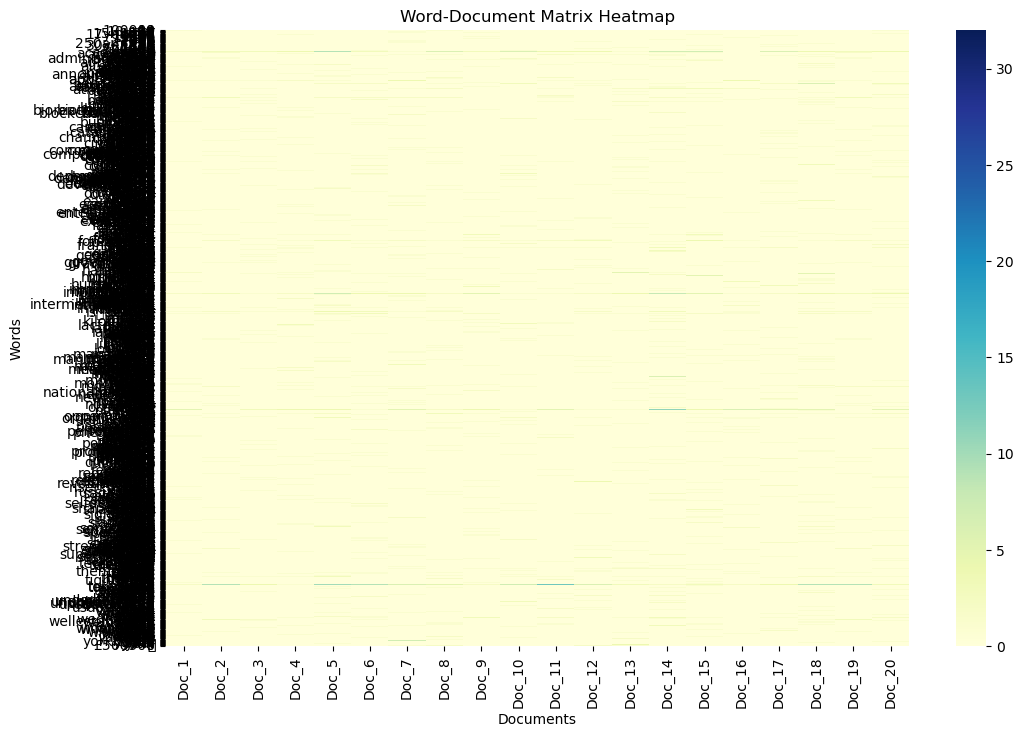

In [17]:
# Creating a heatmap of the word-document matrix
plt.figure(figsize=(12, 8)) 
sns.heatmap(A, cmap='YlGnBu', xticklabels=[f'Doc_{i+1}' for i in range(N)], yticklabels=vocab_list, cbar=True)

# Adding labels and title
plt.xlabel('Documents')
plt.ylabel('Words')
plt.title('Word-Document Matrix Heatmap')

# plot results
plt.show()


**3Q) Using the matrix compute TF-IDF (Links to an external site.) scores for each word**

In [26]:
# Calculate Term Frequency (TF)
TF = A / A.sum(axis=0, keepdims=True)  # Normalize by dividing each term count by the total number of terms in each document

# Calculate Document Frequency (DF)
DF = np.sum(A > 0, axis=1)  # Count the number of documents that contain each word

# Calculate Inverse Document Frequency (IDF)
IDF = np.log((N + 1) / (DF + 1)) + 1  # Compute IDF, adding 1 to prevent division by zero and log(1) which would be zero

# Calculate TF-IDF
TF_IDF = TF * IDF[:, np.newaxis]  # Multiply TF by IDF, adjusting IDF to match the dimensions of TF

# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(TF_IDF)


TF-IDF Matrix:
[[0.02986773 0.         0.         ... 0.         0.         0.01772152]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.0128083  0.         0.0196394 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**4Q) Using cosine similarity (Links to an external site.) find the 3 most similar documents of "10.txt"**

In [27]:
# Find the position of "10.txt" in the list of file names
doc_index = file_names.index("10.txt")

# Retrieve the TF-IDF vector for "10.txt"
query_vector = TF_IDF[:, doc_index].reshape(1, -1)  # Reshape the vector to work with cosine similarity

# Calculate cosine similarity between "10.txt" and all other documents
similarity_scores = cosine_similarity(query_vector, TF_IDF.T)  # Transpose TF-IDF for dimension compatibility

# Convert the similarity scores to a 1D array for easier handling
similarity_scores = similarity_scores.flatten()

# Identify the top 3 most similar documents (excluding "10.txt" itself)
top_indices = np.argsort(similarity_scores)[::-1]  # Sort scores in descending order
top_indices = [index for index in top_indices if index != doc_index][:3]  # Skip "10.txt" and pick the top 3

# Retrieve the filenames of the most similar documents
most_similar_docs = [file_names[index] for index in top_indices]

print("The 3 most similar documents to '10.txt' are:")
print(most_similar_docs)


The 3 most similar documents to '10.txt' are:
['06.txt', '02.txt', '19.txt']


**5Q) Using matrix manipulation and numpy create a new matrix B of size N X N, where Bij will represent the number of common words between document i and j. Note: the diagonal of B should always have the highest value**

In [28]:
# Create an empty matrix B to store the number of common words between documents
B = np.zeros((N, N), dtype=int)

# Calculate the number of common words between each pair of documents
for i in range(N):
    for j in range(N):
        if i == j:
            # For the diagonal elements (same document): Count the number of unique words in the document
            B[i, j] = np.sum(A[:, i] > 0)  # Unique word count in document i
        else:
            # For off-diagonal elements (different documents): Count how many words are shared between documents i and j
            B[i, j] = np.sum((A[:, i] > 0) & (A[:, j] > 0))

# Print the matrix B to show the number of common words between each pair of documents
print("Matrix B (Number of common words between documents):")
print(B)


Matrix B (Number of common words between documents):
[[ 64  13  14  14  15  16  15  14  18  10  12  12   9  21  11  16   8  14
   13  14]
 [ 13  93  21  16  23  25  17  20  12  22  16  13  15  16  17  17  12  21
   93  18]
 [ 14  21  88  12  17  17  18  19   8  15  15  12  15  19  12  17  10  16
   21  17]
 [ 14  16  12  93  19  15  13  17  14  13  17  14  17  21  13  12  12  20
   16  15]
 [ 15  23  17  19 109  23  18  23  11  16  18  19  16  20  19  18  11  26
   23  20]
 [ 16  25  17  15  23 109  17  16  13  38  18  16  14  19  14  17  14  21
   25  20]
 [ 15  17  18  13  18  17 112  23  13  16  14  21  23  22  15  17  10  20
   17  21]
 [ 14  20  19  17  23  16  23  99  16  14  20  12  18  21  22  16  12  30
   20  23]
 [ 18  12   8  14  11  13  13  16  92  14  13  11  15  19  20  12  12  14
   12  14]
 [ 10  22  15  13  16  38  16  14  14  97  18  15  14  18  13  18  11  16
   22  19]
 [ 12  16  15  17  18  18  14  20  13  18  79  14  16  21  18  16  10  18
   16  18]
 [ 12  13  1